In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Define Action class
class Actions:
    def __init__(self):
        self.mean = 0
        self.N = 0

    # Choose a random action
    def choose(self):
        return 0

    # Update the action-value estimate
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0 / self.N)*self.mean + 1.0 / self.N * x

class Actions1(Actions):
    def __init__(self):
        Actions.__init__(self)

    def choose(self):
        return 1

class Actions2(Actions):
    def __init__(self):
        Actions.__init__(self)

    def choose(self):
        return np.random.uniform(-3,7,1)

In [3]:

def run_experiment_eps_greedy(eps, N, trial_num):
        
    a1 = Actions1()
    a2 = Actions2()
    actions = [a1, a2]

    data = np.zeros(N)
    for trial in range(trial_num):
        
        for i in range(N):
            # epsilon greedy
            p = np.random.random()
            if p < eps:
                j = np.random.choice(len(actions))
            else:
                mean = [a.mean for a in actions]
                j = np.argmax(mean)
            x = actions[j].choose()
            actions[j].update(x)

            # for the plot            
            data[i] += x

    # # plot moving average ctr
    # plt.plot(cumulative_average)
    # #plt.plot(np.ones(N)*1)
    # #plt.plot(np.ones(N)*2)
    # plt.xscale('log')
    # plt.show()

    # for a in actions:
    #     print(a.mean)

    return data/trial_num

In [4]:
def run_greedy(N, trial_num):

    a1 = Actions1()
    a2 = Actions2()
    actions = [a1, a2]

    data = np.zeros(N)

    for trial in range(trial_num):
        #drwaing first action

        a1_val = a1.choose()
        a2_val = a2.choose()

        if a1_val > a2_val:
            greedy_actions = a1
        else:
            greedy_actions = a2
        for i in range(N):
            x = greedy_actions.choose()
            greedy_actions.update(x)

            # for the plot
            data[i] += x
    
    return data/trial_num

C:\Users\brama\miniconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


1.8510863181688493

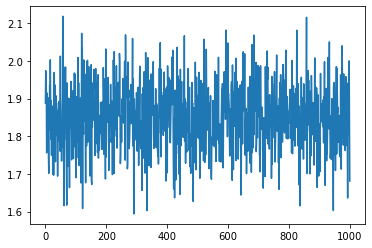

In [17]:
c_3 = run_experiment_eps_greedy(0.3, 1000, 1000)
plt.plot(c_3)

c_3.mean()

C:\Users\brama\miniconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


1.747860322708748

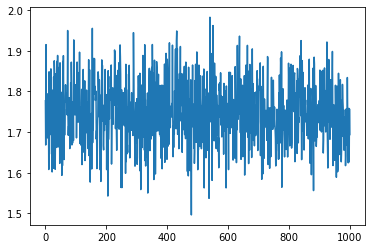

In [7]:
c_01 = run_experiment_eps_greedy(0.5, 1000, 1000)
plt.plot(c_01)

c_01.mean()

In [ ]:
a = run_greedy(1000,1000)
plt.plot(a)
a.mean()

(array([ 16.,  44., 131., 192., 255., 205., 106.,  42.,   7.,   2.]),
 array([1.72828605, 1.78709364, 1.84590123, 1.90470882, 1.96351641,
        2.022324  , 2.08113159, 2.13993918, 2.19874677, 2.25755436,
        2.31636195]),
 <BarContainer object of 10 artists>)

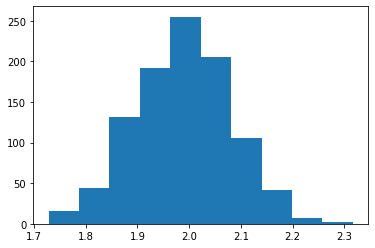

In [27]:
plt.hist(c_01)